# **Predicting and Analyzing Factors Influencing Student Academic Performance**
---

# Data cleaning and Preprocessing

## Importing required libraries and Extracting Dataset



In [7]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
!pip install -U plotly

In [1]:
import plotly
print(plotly.__version__)

5.24.1


In [2]:
import plotly.express as px
import plotly.io as pio

In [8]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/BeccaHuynh/Alcohol-Effects-on-Study/refs/heads/main/Portuguese.csv')

## Data Profiling

In [ ]:
#Display first few rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
#Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
# Number of Duplicate Rows
df.duplicated().sum()

0

The dataset includes 649 unique rows and has neither no missing values nor wrong data types.

In [ ]:
# Show all columns
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [9]:
#Create new column 'Alc' : alcohol consumption for the whole week (numeric: from 1 - very low to 5 - very high)
df['Alc']= (df['Dalc'] + df['Walc'])/2

## Summary Statistics

In [ ]:
#Summary Statistics for Numerical Columns
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
#Summary Statistics for Non-Numeric Columns
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


**Key Observations**

---

*Most students come from school 'GP', are female, and live in urban areas. The majority of students have internet access at home, do not participate in additional paid classes, and come from families that support education*

- Age: Most students are between 16 and 18 years old.

- Parental Education: Parents' education levels average around 2 to 2.5, indicating a middle level of education (considering the scale from 0 to 4).

- Studytime: On average, students study less than 2 to 5 hours per week.

- Alcohol Consumption: Average weekdays alcohol consumption is low,
around 1.5. On weekend, average alcohol consumption is moderate, reach approximately 2.3 (on a scale from 1 to 5).

- Final Grades: The mean final grade (G3) is approximately 11.91, with some variation among students.


## Correlation Heatmap

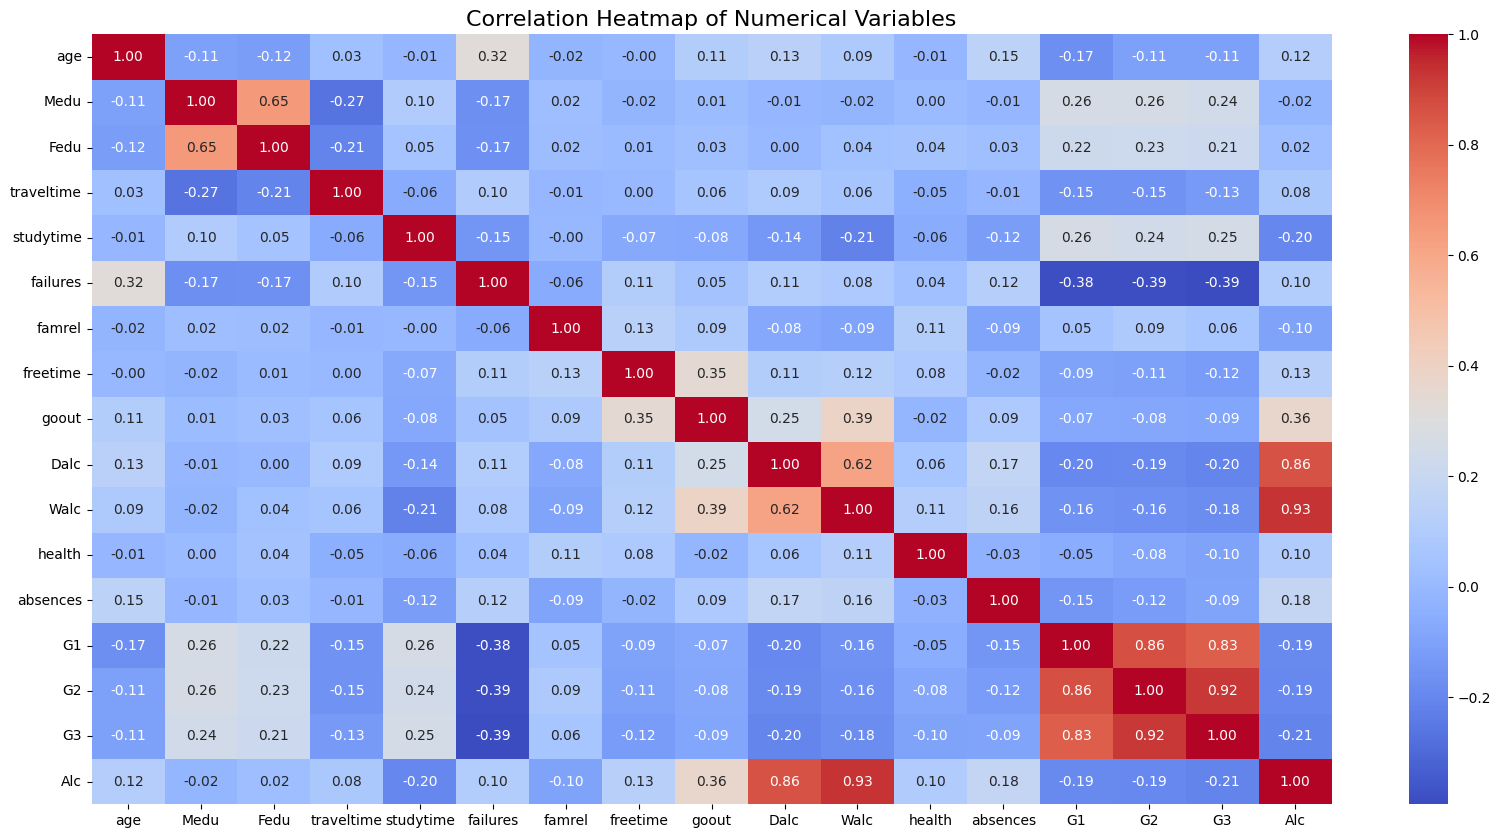

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

#Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

#Create the heatmap
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

**Key Observations**

---


- The correlation between Mother's Education and Father's Education is high.
- The correlation between G1,G2,G3 is very high. This implies that the student who is consistently scoring good grades in G1 and G2 is more likely to score high in G3.

## Exploratory Data Visualization

In [10]:
#Create a copy dataframe for EDA
df_2= df.copy()
#Classifying students as 'Above Average' and 'Below Average'
temp = ['Above Average' if value>10 else 'Below Average' for value in df_2['G3']]
df_2['G3']= temp

#List out wanted colors for further consistency
custom_colors = ['#4185f4', '#f3bf56', '#f5dada','tomato','green','#ff0000']

#Create histograms for each variables
features= ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']
for feature in features:
  fig = px.histogram(df_2, x= feature, color='G3', barnorm='percent',
                   color_discrete_sequence=custom_colors)
  fig.show()
  pio.write_image(fig, "test_chart.png")

**Key Observations**

---

**1. Personal Background**
- Students with more educated parents tend to perform better.
- Students whose either of parents is a teacher tend to score above average marks.
- The students from Urban areas tend to score more than those from Rural areas.

**2. Academic Factors**
- The Students who want to pursue higher education tend to score higher than those who do not. Maybe pursuing higher education is the reason that students are serious about their studies.

- Students who have encountered more number of past class failures tend to score less.

**3. Social Factors**
- Alcohol consumption negatively effects the overall performance of student.

- The Students with internet facilities tend to score better than who don't (more than 12%)

- The percentage of females scoring above average marks is higher than that of males.

**Based on these key observations, further analysis to ensure patterns, trends and gain actionable insights.**

---

Create a copy dataframe named 'df_3' for better use.

In [13]:
#Create a copy dataframe
df_3= df.copy()
# Calculate the highest level of parental education
df_3["Highest_Parental_Education"] = df[["Medu", "Fedu"]].max(axis=1)

In [11]:
# Group by Study time and calculate average G3
avg_g3_by_study= df.groupby("studytime", as_index=False)["G3"].mean()

# Create the bar chart
fig = px.bar(avg_g3_by_study, x="studytime", y="G3",
    text="G3",
    color="studytime",
    color_continuous_scale=px.colors.sequential.Oryel,
    title="Average Final Grades (G3) by Study time")

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis=dict(title="weekly study time (1- <2 hours, 2- 2 to 5 hours, 3- 5 to 10 hours, or 4 - >10 hours)"),
    yaxis=dict(title="Average Final Grades (G3)"),
    height=500,
    width=1200
)
fig.show()
pio.write_image(fig, "test_chart.png")

In [14]:
# Group by highest parental education and calculate average G3
avg_g3_by_education = df_3.groupby("Highest_Parental_Education", as_index=False)["G3"].mean()
# Create the bar chart
fig = px.bar(
    avg_g3_by_education,
    x="Highest_Parental_Education",
    y="G3",
    text="G3",
    color="Highest_Parental_Education",
    color_continuous_scale=px.colors.sequential.Oryel,
    title="Average Final Grades (G3) by Highest Parental Education Level",
    labels={"G3": "Average Final Grades"}
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(

    yaxis=dict(title="Average Final Grades (G3)"),
    height=500,
    width=1200
)

fig.show()
pio.write_image(fig, "test_chart.png")

In [15]:
#Create a new dataframe smokers_df containing only info about female customers.
pjob_teacher= df[(df['Mjob'] == 'teacher') | (df['Fjob'] == 'teacher')]
#Calculate measures of central tendency of female customers
t_min= pjob_teacher.G3.min()
t_max= pjob_teacher.G3.max()
t_mean= pjob_teacher.G3.mean()
t_median= pjob_teacher.G3.median()

#Calculate measures of central tendency for the whole dataset
common_grade_min= df.G3.min()
common_grade_max= df.G3.max()
common_grade_mean= df.G3.mean()
common_grade_median= df.G3.median()

all_vals_dict = {
    'Common': {'min': common_grade_min, 'max': common_grade_max, 'mean': common_grade_mean, 'median': common_grade_median},
    'Parent job is Teacher': {'min': t_min, 'max': t_max, 'mean': t_mean, 'median': t_median}
}
# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Parent job is Teacher
min,0.000000,0.000000
max,19.000000,19.000000
mean,11.906009,13.097826
median,12.000000,13.000000


In [16]:
# Group by Alcohol consumption level and calculate average G3
df['Alc']= round(df['Alc'],0)
avg_g3_by_alc = df.groupby("Alc", as_index=False)["G3"].mean()

# Create the bar chart
fig = px.bar(avg_g3_by_alc, x="Alc", y="G3",
    text= "G3", color="Alc",
    color_continuous_scale=px.colors.sequential.Oryel,
    title="Average Final Grades (G3) by Alcohol Consumption Level"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis=dict(title="Alcohol Consumption Level (1 =Very low, 5 =Very high)"),
    yaxis=dict(title="Average Final Grades (G3)"),
    height=500,
    width=1200
)
fig.show()
pio.write_image(fig, "test_chart.png")

In [17]:
#Group by highest parental education and calculate average G3
avg_g3_by_internet = df.groupby("internet", as_index=False)["G3"].mean()

# Create the bar chart
fig = px.bar(
    avg_g3_by_internet,
    x="internet",
    y="G3",
    text="G3",
    color= "internet",
    color_discrete_sequence=custom_colors,
    title="Average Final Grades (G3) by Internet Access")

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis=dict(title="Internet Access"),
    yaxis=dict(title="Average Final Grades (G3)"),
)

fig.show()
pio.write_image(fig, "test_chart.png")

In [18]:
df_3.Alc= round(df_3.Alc,0)

grouped_data = df_3.groupby(["sex", "studytime", "Alc", "internet"], as_index=False)["G3"].mean()
fig = px.bar(
    grouped_data,
    x="Alc",
    y="G3",
    color="sex",
    barmode="group",
    facet_col="studytime",
    facet_row="internet",
    text="G3",
    color_discrete_sequence=['pink', '#4185f4'],
    title="Comparison of Final Grades (G3) for Male vs. Female Students with Study Time, Alcohol Consumption Level")

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    height= 800,
    width= 1200
)
fig.show()
pio.write_image(fig, "test_chart.png")

In [19]:
# Create a grouped dataframe for Urban vs Rural, with study time, internet access, and parental education
grouped_data = df_3.groupby(["address", "studytime", "internet", "Highest_Parental_Education"], as_index=False)["G3"].mean()

# Rename 'address' values for better readability
grouped_data["address"] = grouped_data["address"].replace({"U": "Urban", "R": "Rural"})

# Create the grouped bar chart
fig = px.bar(
    grouped_data,
    x="Highest_Parental_Education",
    y="G3",
    color="address",
    barmode="group",
    facet_col="studytime",
    facet_row="internet",
    text="G3",
    color_discrete_sequence=custom_colors,
    title="Comparison of Final Grades (G3) for Urban vs. Rural Students with Study Time, Internet Access, and Parental Education",
    labels={"Highest_Parental_Education": "Highest Parental Education",
            "G3": "Average Final Grades (G3)",
            "address": "Location",
            "studytime": "Study Time",
            "internet": "Internet Access"})

fig.update_traces(texttemplate='%{text:.2f}', textposition="outside")
fig.update_layout(height=800,width=1200)

fig.show()
pio.write_image(fig, "test_chart.png")


### **Observations**
---
1. Social factors
- Females generally have better grades than males regarding study time, alcohol consumption or internet access.
- Students with the least or most socialization might lack balance between academics and their social life.
- High alcohol consumption (levels 4-5) is consistently associated with the lowest grades.

2. Academic factors
- Increased study time positively impacts grades.
- The chart shows that the number of past class failures strongly affects student academic performance.  
- Student’s intention of taking higher education
also heavily influence their study performance.

3. Personal background
- Higher parental education leads to better performance
- The mean grade is higher when at least one parent works as a teacher (13.10) compared to the general population (11.91).

### **Actionable Insights**
---

1. Gender-specific support
- Males: Provide mentorship or targeted counselling focusing on balancing social activities (like drinking) with academics.
- Females: Encourage leadership in study groups to share their strategies and habits for academic success.

2. Promote a Balanced Lifestyle
- Encourage moderate socialization (neither too low nor too high) via school-led team activities and clubs.
- Offer time management training to help students balance study (targeting 5-10 hours/week) with leisure.

3. Address Alcohol Consumption
- Organize awareness programs about alcohol's effect on academic performance.
- Introduce alternatives like social events or hobby clubs to replace high-alcohol gatherings.

4. Motivate and Support Struggling Students
- Apply early intervention programs for students with prior failures, including tutoring and mentorship.
- Offer career counseling and highlight higher education benefits to inspire long-term goals.

5. Parental & facilator involvement
- Organize workshops for parents to guide them in supporting their children’s academics.
- Create dedicated spaces with internet access and digital resources within schools.

In [ ]:
# Group by goout and calculate average G3
avg_g3_goout = df_3.groupby("goout", as_index=False)["G3"].mean()

# Create the bar chart
fig = px.bar(
    avg_g3_goout,
    x="goout",
    y="G3",
    text="G3",
    color="goout",
    color_continuous_scale=px.colors.sequential.Oryel,
    title="Average Final Grades (G3) by level of going out with friends",
    labels={"goout": "Level of going out with friends",
            "G3": "Average Final Grades (G3)"})

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis=dict(title="Level of going out with friends (1 - very low to 5 - very high"),
                  height=500,
                  width=1200)

fig.show()

# Modeling

Processing dataset before building model.

In [ ]:
# Processing categorical data with one hot encoding
# Columns that contain 2-3 unique values
categorical_features= np.array([
    'school', 'sex',
    'address', 'famsize',
    'Pstatus', 'guardian',
    'schoolsup', 'reason',
    'famsup', 'paid',
    'activities', 'nursery',
    'higher', 'internet',
    'romantic'
])
for category in categorical_features:
    category_encoding = pd.get_dummies(df[[category]], drop_first=True)
    df = pd.concat([df.drop([category], axis=1), category_encoding], axis=1)

# Columns that contain more than 3 unique values
categorical_features_2= np.array([
    'Mjob', 'Fjob'
])
for category in categorical_features_2:
    category_encoding = pd.get_dummies(df[[category]], drop_first=False)
    df = pd.concat([df.drop([category], axis=1), category_encoding], axis=1)
#Since we have create 'Alc' drop out 'Dalc', 'Walc' for better use
df= df.drop(['Dalc', 'Walc'], axis=1)

Correlation heatmap before filter out variables.

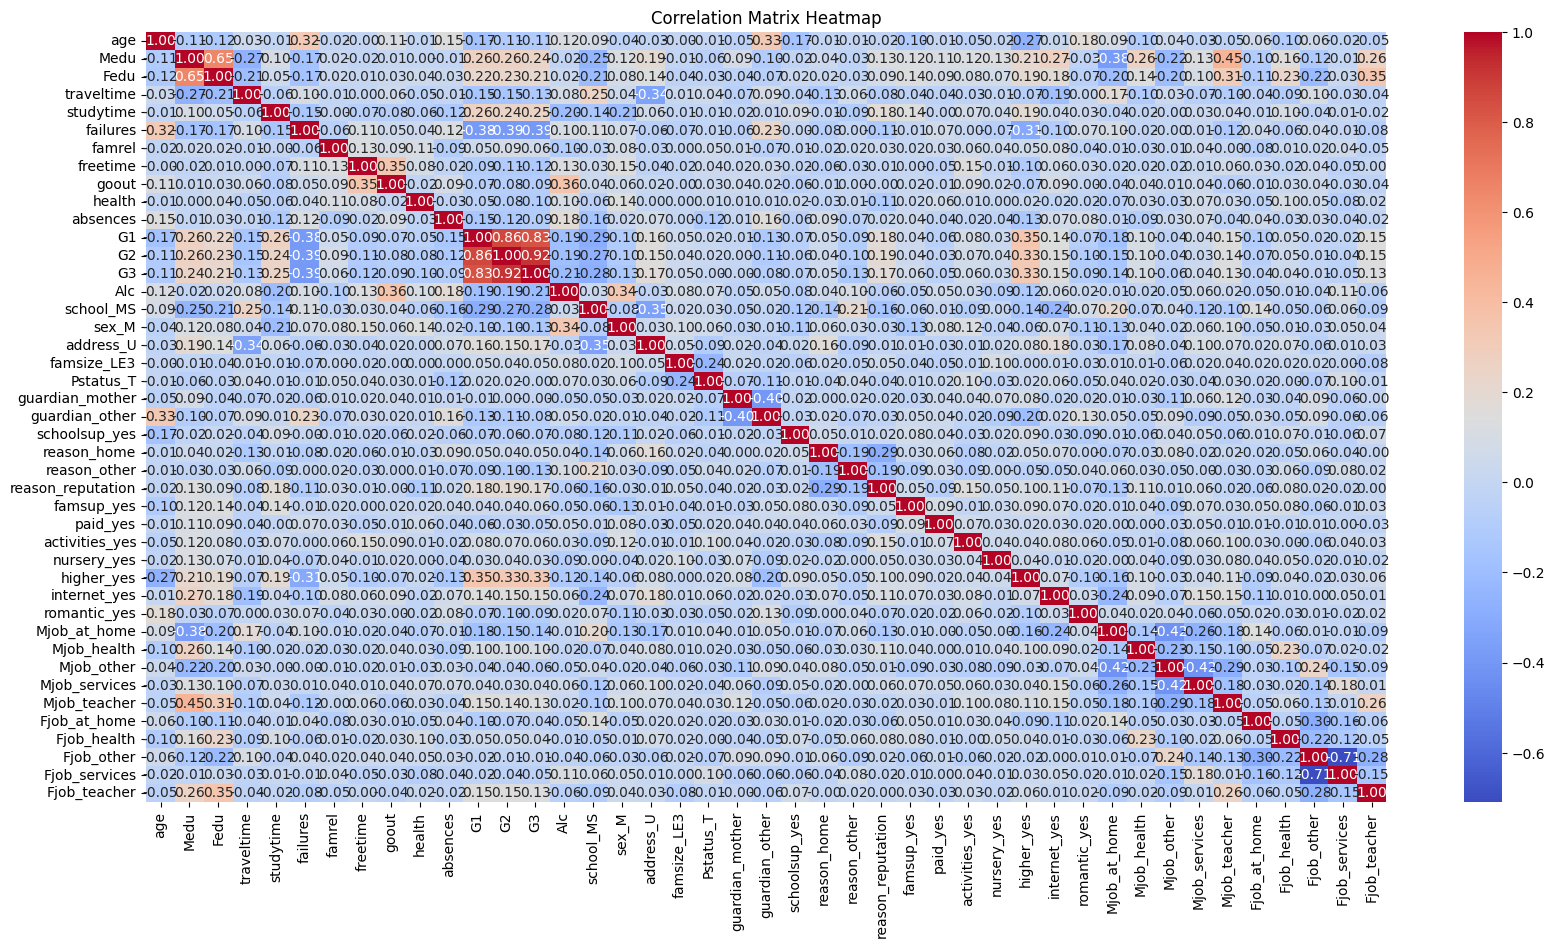

In [ ]:
# Calculating correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True,fmt = '.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

plt.show()

## Correlation Flitering

In [ ]:
#Correlation Filtering
abs(correlation_matrix["G3"]).sort_values(ascending=False).head(12).index

Index(['G3', 'G2', 'G1', 'failures', 'higher_yes', 'school_MS', 'studytime',
       'Medu', 'Fedu', 'Alc', 'reason_reputation', 'address_U'],
      dtype='object')

Correlation heatmap after filtering

<Axes: >

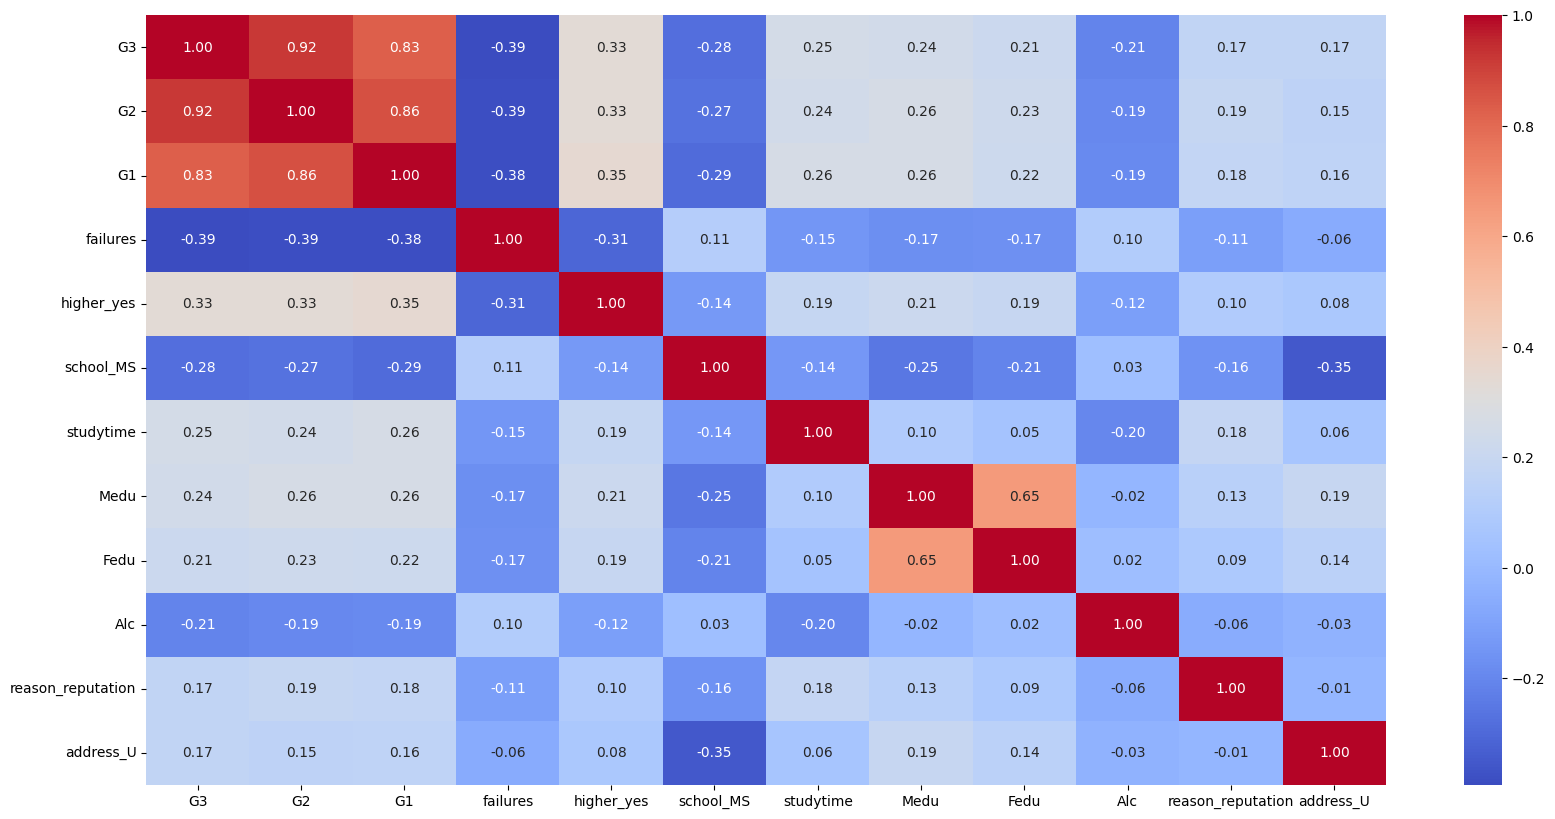

In [ ]:
#Create a heatmap with only high-correlated variables
variables= ['G3', 'G2', 'G1', 'failures', 'higher_yes', 'school_MS', 'studytime',
       'Medu', 'Fedu', 'Alc', 'reason_reputation', 'address_U']
df_2 = pd.concat([df[i] for i in variables], axis=1)


correlation_matrix = df_2.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True,fmt = '.2f', cmap='coolwarm')

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

# Define predictors and target variable
X = df[['G2', 'G1', 'failures', 'higher_yes', 'school_MS', 'studytime',
         'Medu', 'Fedu', 'Alc', 'reason_reputation', 'address_U', 'internet_yes',
         'Mjob_at_home', 'Mjob_teacher']]

X = X.replace({True: 1, False: 0})
y = df['G3']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-101-b572de16f038>:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



## OLS

In [ ]:
# Import necessary libraries
import statsmodels.api as sm

# # Define predictors and target variable
# X = df[['G2', 'G1', 'failures', 'higher_yes', 'school_MS', 'studytime',
#          'Medu', 'Fedu', 'Alc', 'reason_reputation', 'address_U', 'internet_yes',
#          'Mjob_at_home', 'Mjob_teacher']]
# X = X.replace({True: 1, False: 0})  # Convert boolean to 1/0

# y = df['G3']

# Split data into training (80%) and testing (20%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to training predictors
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# View the model summary
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)/np.mean(y_test)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root-mean-square deviation: {rmse:.2f}")

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              3342.
Date:                Fri, 27 Dec 2024   Prob (F-statistic):                        0.00
Time:                        10:06:46   Log-Likelihood:                         -857.99
No. Observations:                 519   AIC:                                      1744.
Df Residuals:                     505   BIC:                                      1804.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## Random Forest

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# # Select relevant features and target variable
# X = df[['G2', 'G1', 'failures', 'higher_yes', 'school_MS', 'studytime',
#          'Medu', 'Fedu', 'Alc', 'reason_reputation', 'address_U', 'internet_yes',
#          'Mjob_at_home', 'Mjob_teacher']]
# X = X.replace({True: 1, False: 0})  # Convert boolean to 1/0

# y = df['G3']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse= np.sqrt(mse)/np.mean(y_test)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root-mean-square deviation: {rmse:.2f}")

Mean Squared Error: 2.20
R-squared: 0.77
Root-mean-square deviation: 0.12


## Model comparison

In [ ]:
all_vals_dict = {
    'OLS': {'Mean Squared Error': 1.14, 'R-squared': 0.86, 'Root-mean-square deviation': 0.10},
    'Random Forest': {'Mean Squared Error': 2.20, 'R-squared': 0.77, 'Root-mean-square deviation': 0.12}
}
# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,OLS,Random Forest
Mean Squared Error,1.14,2.20
R-squared,0.86,0.77
Root-mean-square deviation,0.10,0.12


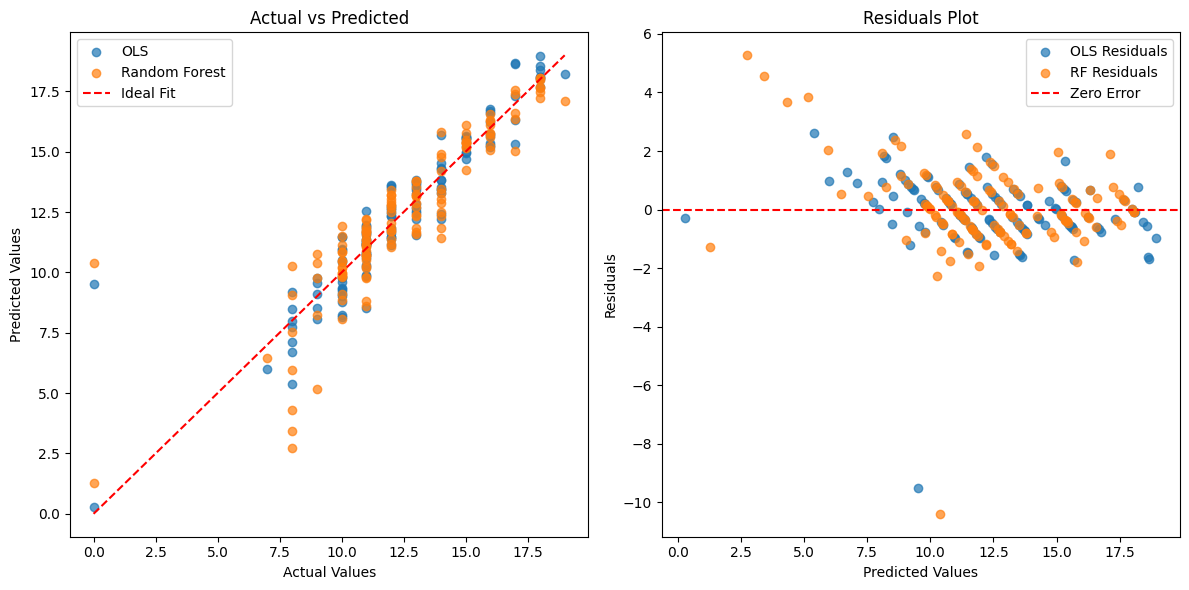

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming you have trained models: 'ols_model' and 'rf_model'
# and a test dataset with features 'X_test' and target 'y_test'

# 1. Generate predictions
ols_preds = model.predict(X_test)
rf_preds = rf_regressor.predict(X_test)

# 2. Calculate residuals
ols_residuals = y_test - ols_preds
rf_residuals = y_test - rf_preds

# 3. Create plots
plt.figure(figsize=(12, 6))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, ols_preds, label='OLS', alpha=0.7)
plt.scatter(y_test, rf_preds, label='Random Forest', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Residuals Plot
plt.subplot(1, 2, 2)
plt.scatter(ols_preds, ols_residuals, label='OLS Residuals', alpha=0.7)
plt.scatter(rf_preds, rf_residuals, label='RF Residuals', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()
